# General description of "chickwts.txt" dataset.



### Import packages and data

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from scipy.optimize import minimize
from scipy.stats import norm
from plotnine import *

chickens=pd.read_table("chickwts.txt", delimiter=",")


### 1. Calculate mean weight of chickens based on feed source

#### create an empty dictionary for "means". Fill by using a for loop to loop through each type of chicken feed, and add the mean weight of chickens for each feed to the dictionary entry for that feed.

In [21]:
means=dict()

for i in np.unique(chickens.feed):
    means[i]=np.mean(chickens[chickens.feed == i][["weight"]])[0]
    
means_df=pd.DataFrame(means, index =[0])
means_df

,casein,horsebean,linseed,meatmeal,soybean,sunflower
0,323.583333,160.2,218.75,276.909091,246.428571,328.916667


### 2. Generate a plot summarizing chicken weight data

#### use ggplot2 to create a boxplot of "chickwts.txt" data, plotting chicken **weight** on the y axis, grouped by chicken **feed**

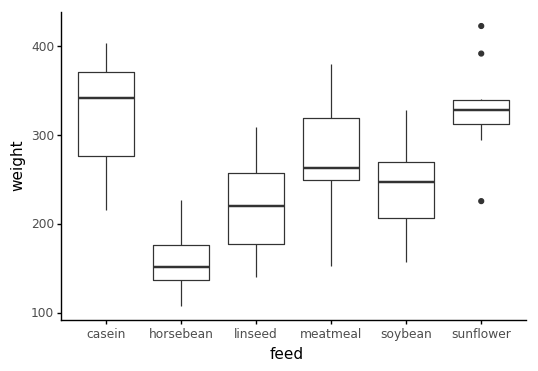

<ggplot: (8741302840413)>

In [22]:
ggplot(chickens, aes(x="feed",y="weight")) + geom_boxplot() + theme_classic()

### 3. Null and alternative hyptheses for the difference in **chick weight** when fed **soybean feed** vs **sunflower feed**

#### *Null hypothesis: mean(sunflower)-mean(soybean) = 0*

#### *Alternative hypothesis: mean(sunflower)-mean(soybean) =/= 0*

### 4. Test Null and alternative hypotheses using chi-2 likelihood test

#### Create a data "sun_soy_chickens" containing only data of interest (chickens fed on soybean or sunflower feed). Add a column "Factor" to this new data frame, containing a 1 for chickens fed with sunflower feed, and a 0 for chickens fed with soybean feed.

In [23]:
sun_soy_chickens=chickens[(chickens.feed == "sunflower") | (chickens.feed == "soybean")]

sun_soy_chickens["Factor"]=0
for i in range(0, len(sun_soy_chickens.feed)):
    if sun_soy_chickens.feed.iloc[i] == "sunflower":
        sun_soy_chickens.iloc[i,2]=1
    else:
        sun_soy_chickens.iloc[i,2]=0
        
sun_soy_chickens

/home/tb/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,weight,feed,Factor
22,243,soybean,0
23,230,soybean,0
24,248,soybean,0
25,327,soybean,0
26,329,soybean,0
27,250,soybean,0
28,193,soybean,0
29,271,soybean,0
30,316,soybean,0
31,267,soybean,0


#### Define null and alternative hypothesis functions

In [24]:
def nllalt(p,obs):
    B0=p[0]
    sigma=p[1]
    B1=p[2]
    
    expected=B0+B1*obs.Factor
    nll=-1*norm(expected,sigma).logpdf(obs.weight).sum()
    return nll
    
    
def nllnull(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll=-1*norm(expected,sigma).logpdf(obs.weight).sum()
    return nll

#### Make guess, use minimize function to find optimal coefficients for alternative and null hypothesis functions. T test to determine the significance of the factor (presence of sunflower seed) in determining the weight of chickens in this study

In [25]:
guess=[1,1,1]

fit_alt=minimize(nllalt, guess, method="Nelder-Mead", options={'disp': True},args=sun_soy_chickens)
fit_null=minimize(nllnull, guess, method="Nelder-Mead", options={'disp': True},args=sun_soy_chickens)

D=2*(fit_null.fun-fit_alt.fun)
1-chi2.cdf(x=D, df=1)

Optimization terminated successfully.
         Current function value: 138.469162
         Iterations: 200
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 145.240592
         Iterations: 138
         Function evaluations: 261


0.00023317672869682671

### Interpreting the result of the likelihood ratio test

#### Since the P-value is \<0.05, there is a significant difference in chicken weights between chickens fed on sunflower and soybean feed.